### Index objects and labeled data
#### Creating a Series

In [1]:
import pandas as pd

In [2]:
prices = [10.70, 10.86, 10.74, 10.71, 10.79] 

In [3]:
shares = pd.Series(prices)

In [4]:
shares

0    10.70
1    10.86
2    10.74
3    10.71
4    10.79
dtype: float64

#### Creating an index

In [5]:
days = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri']

In [6]:
shares = pd.Series(prices, index=days) 

In [7]:
shares

Mon     10.70
Tue     10.86
Wed     10.74
Thur    10.71
Fri     10.79
dtype: float64

#### examining index

In [8]:
shares.index

Index(['Mon', 'Tue', 'Wed', 'Thur', 'Fri'], dtype='object')

In [9]:
shares.index[2]

'Wed'

In [10]:
shares.index[:2]

Index(['Mon', 'Tue'], dtype='object')

In [11]:
shares.index[-2:]

Index(['Thur', 'Fri'], dtype='object')

In [12]:
shares.index.name

In [14]:
shares.index.name = "weekday"

In [15]:
shares

weekday
Mon     10.70
Tue     10.86
Wed     10.74
Thur    10.71
Fri     10.79
dtype: float64

### Modifying index entries

In [16]:
#index does not support mutable operations
shares.index[3] = "Wednesday"

TypeError: Index does not support mutable operations

In [17]:
#index does not support mutable operations 
shares.index[:4] = ['Monday', 'Tuesday', 'Wednesday', 'Thursday']

TypeError: Index does not support mutable operations

In [19]:
# it's possible to modify index but fully
shares.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] 

#### unimployment data example

In [ ]:
unemployment = pd.read_csv('Unemployment.csv') 

In [21]:
unemployment.index = unemployment['Zip']
#now index and "Zip" column contain the same data, ergo we can delete the latter

In [ ]:
del unemployment["Zip"]

In [ ]:
# we could set index from the very beginning
unemployment = pd.read_csv("unemployment.csv", index_col = "Zip")

#### Changing index of a DataFrame
As you saw in the previous exercise, indexes are immutable objects. This means that if you want to change or modify the index in a DataFrame, then you need to change the whole index. You will do this now, using a list comprehension to create the new index.

A list comprehension is a succinct way to generate a list in one line. For example, the following list comprehension generates a list that contains the cubes of all numbers from 0 to 9: cubes = [i**3 for i in range(10)]. This is equivalent to the following code:

cubes = []
for i in range(10):
    cubes.append(i**3)
Before getting started, print the sales DataFrame in the IPython Shell and verify that the index is given by month abbreviations containing lowercase characters.

By the way, if you haven't downloaded it already, check out the Pandas Cheat Sheet. It includes an overview of the most important concepts, functions and methods and might come in handy if you ever need a quick refresher!

- Create a list new_idx with the same elements as in sales.index, but with all characters capitalized.
- Assign new_idx to sales.index.
- Print the sales dataframe. This has been done for you, so hit 'Submit Answer' and to see how the index changed.

In [ ]:
# Create the list of new indexes: new_idx
new_idx = [item.upper() for item in sales.index]

# Assign new_idx to sales.index
sales.index = new_idx

# Print the sales DataFrame
print(sales)

### Changing index name labels
Notice that in the previous exercise, the index was not labeled with a name. In this exercise, you will set its name to 'MONTHS'.

Similarly, if all the columns are related in some way, you can provide a label for the set of columns.

To get started, print the sales DataFrame in the IPython Shell and verify that the index has no name, only its data (the month names).

- Assign the string 'MONTHS' to sales.index.name to create a name for the index.
- Print the sales dataframe to see the index name you just created.
- Now assign the string 'PRODUCTS' to sales.columns.name to give a name to the set of columns.
- Print the sales dataframe again to see the columns name you just created.

In [ ]:
# Assign the string 'MONTHS' to sales.index.name
sales.index.name ="MONTHS"

# Print the sales DataFrame
print(sales)

# Assign the string 'PRODUCTS' to sales.columns.name 
sales.columns.name = "PRODUCTS"

# Print the sales dataframe again
print(sales)

### Building an index, then a DataFrame
You can also build the DataFrame and index independently, and then put them together. If you take this route, be careful, as any mistakes in generating the DataFrame or the index can cause the data and the index to be aligned incorrectly.

In this exercise, the sales DataFrame has been provided for you without the month index. Your job is to build this index separately and then assign it to the sales DataFrame. Before getting started, print the sales DataFrame in the IPython Shell and note that it's missing the month information.

- Generate a list months with the data ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']. This has been done for you.
- Assign months to sales.index.
- Print the modified sales dataframe and verify that you now have month information in the index.

In [ ]:
# Generate the list of months: months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

# Assign months to sales.index
sales.index = months

# Print the modified sales DataFrame
print(sales)

# Hierarchical indexing


In [1]:
import pandas as pd

In [ ]:
stocks = pd.read_csv(filename)

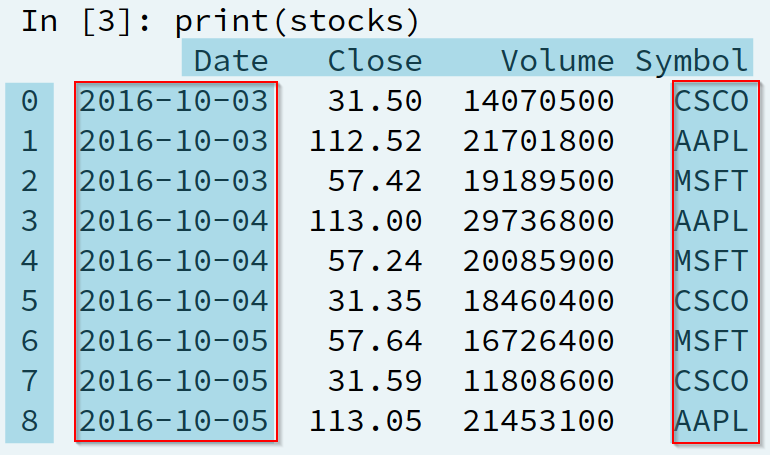

In [ ]:
#using touple to set index based on Symbol; and date
stocks = stocks.set_index(['Symbol', 'Date']) 

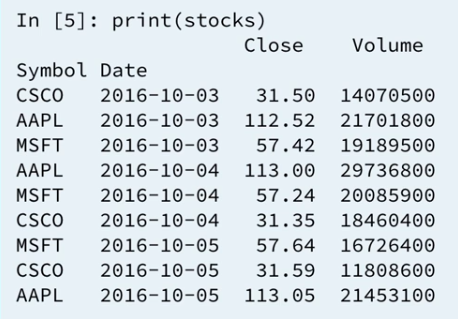

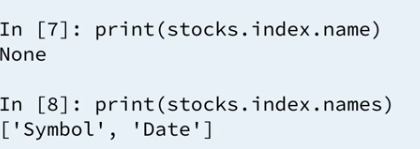

### sorting index

In [ ]:
stocks = stocks.sort_index()

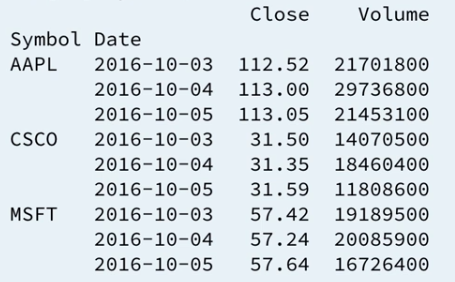

### indexing individual row

In [ ]:
stocks.loc[("CSCO", "2016-10-04")]

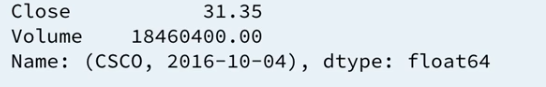

In [ ]:
stocks.loc[("CSCO", "2016-10-04"), "Volume"]

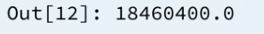

### slicing (outermost index)

In [ ]:
stocks.loc["AAPL"]
#this will return all the rows corresponding to AAPL trades

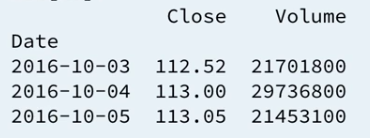

In [ ]:
stocks.loc["CSCO":"MSFT"]

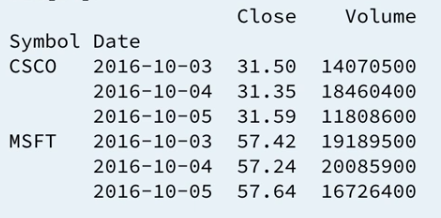

### fancy indexing (lists in indexing)

In [ ]:
stocks.loc[(['AAPL', 'MSFT'], '2016-10-05'), :] 

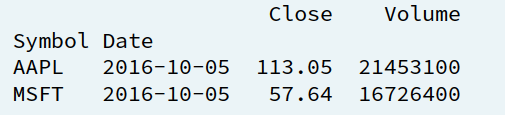

In [ ]:
stocks.loc[(['AAPL', 'MSFT'], '2016-10-05'), 'Close'] 

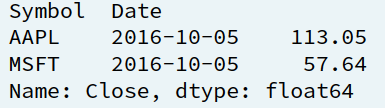

### Fancy indexing on innermost index

In [ ]:
stocks.loc[('CSCO', ['2016-10-05', '2016-10-03']), :] 

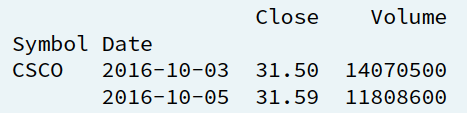

### slicing both indexes

In [ ]:
stocks.loc[(slice(None), slice('2016-10-03', '2016-10-04')),:]

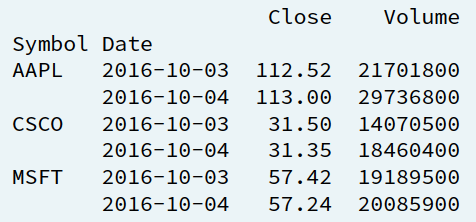

# practice
### Extracting data with a MultiIndex
In the video, Dhavide explained the concept of a hierarchical index, or a MultiIndex. You will now practice working with these types of indexes.

The sales DataFrame you have been working with has been extended to now include State information as well. In the IPython Shell, print the new sales DataFrame to inspect the data. Take note of the MultiIndex!

Extracting elements from the outermost level of a MultiIndex is just like in the case of a single-level Index. You can use the .loc[] accessor as Dhavide demonstrated in the video.

Print sales.loc[['CA', 'TX']]. Note how New York is excluded.
Print sales['CA':'TX']. Note how New York is included.

In [2]:
sales = pd.read_csv("sales.csv")

In [3]:
sales

,month,eggs,salt,spam
0,Jan,47,12.0,17
1,Feb,110,50.0,31
2,Mar,221,89.0,72
3,Apr,77,87.0,20
4,May,132,NaN,52
5,Jun,205,60.0,55


In [ ]:
# Print sales.loc[['CA', 'TX']]
print(sales.loc[['CA', 'TX']])

# Print sales['CA':'TX']
print(sales['CA':'TX'])

## Setting & sorting a MultiIndex
In the previous exercise, the MultiIndex was created and sorted for you. Now, you're going to do this yourself! With a MultiIndex, you should always ensure the index is sorted. You can skip this only if you know the data is already sorted on the index fields.

To get started, print the pre-loaded sales DataFrame in the IPython Shell to verify that there is no MultiIndex.

- Create a MultiIndex by setting the index to be the columns ['state', 'month'].
- Sort the MultiIndex using the .sort_index() method.
- Print the sales DataFrame. This has been done for you, so hit 'Submit Answer' to verify that indeed you have an index with the fields state and month!

In [ ]:
# Set the index to be the columns ['state', 'month']: sales
sales = sales.set_index(['state', 'month'])

# Sort the MultiIndex: sales
sales = sales.sort_index()

# Print the sales DataFrame
print(sales)

### Using .loc[] with nonunique indexes
As Dhavide mentioned in the video, it is always preferable to have a meaningful index that uniquely identifies each row. Even though pandas does not require unique index values in DataFrames, it works better if the index values are indeed unique. To see an example of this, you will index your sales data by 'state' in this exercise.

As always, begin by printing the sales DataFrame in the IPython Shell and inspecting it.

- Set the index of sales to be the column 'state'.
- Print the sales DataFrame to verify that indeed you have an index with state values.
- Access the data from 'NY' and print it to verify that you obtain two rows.


In [ ]:
# Set the index to the column 'state': sales
sales = sales.set_index(["state"])
# Print the sales DataFrame
print(sales)
# Access the data from 'NY'
print(sales.loc["NY"])

### Indexing multiple levels of a MultiIndex
Looking up indexed data is fast and efficient. And you have already seen that lookups based on the outermost level of a MultiIndex work just like lookups on DataFrames that have a single-level Index.

Looking up data based on inner levels of a MultiIndex can be a bit trickier. The trickiest of all these lookups are when you want to access some inner levels of the index. In this case, you need to use slice(None) in the slicing parameter for the outermost dimension(s) instead of the usual :, or use pd.IndexSlice. You can refer to the pandas documentation for more details. For example, in the video, Dhavide used the following code to extract rows from all Symbols for the dates Oct. 3rd through 4th inclusive:

stocks.loc[(slice(None), slice('2016-10-03', '2016-10-04')), :]
Pay particular attention to the tuple (slice(None), slice('2016-10-03', '2016-10-04')).

In this exercise, you will use your sales DataFrame to do some increasingly complex lookups. Remember that you can type sales.head() in the console to review the structure of the DataFrame!

- Look up data for New York ('NY') in month 1 in the sales DataFrame.
- Look up data for California and Texas ('CA', 'TX') in month 2.
- Access the inner index month and look up data for all states in month 2. Use (slice(None), 2) to extract all rows in month 2.


In [ ]:
# Look up data for NY in month 1 in sales: NY_month1
NY_month1 = sales.loc["NY",1]

# Look up data for CA and TX in month 2: CA_TX_month2
CA_TX_month2 = sales.loc[(["CA", "TX"],2),:]

# Access the inner month index and look up data for all states in month 2: all_month2
all_month2 = sales.loc[(slice(None), 2), :]